# 🦷 مشروع تحليل موثوقية عيادات الأسنان باستخدام LLM

تحليل التقييمات النصية لتحديد العيادات الأكثر ثقة بناءً على نسبة التقييمات الحقيقية.

# قراءة البيانات + EDA سريع

In [ ]:
# إذا كان الملف موجود على جهازك، قم برفعه إلى Google Colab
from google.colab import files
uploaded = files.upload()

# بعد الرفع، ضع اسم الملف هنا (تأكد من تطابق الاسم تمامًا)
import pandas as pd

# مثال: إذا كان اسم الملف cleaned_dental_reviews.csv
data_path = "cleaned_dental_reviews.csv"

# قراءة البيانات من الملف
df = pd.read_csv(data_path)

# عرض شكل البيانات (عدد الصفوف والأعمدة)
print("شكل البيانات:", df.shape)

# عرض أول 5 صفوف من البيانات
print("\nأول 5 صفوف:")
display(df.head())

# عرض أسماء الأعمدة
print("\nأسماء الأعمدة:")
print(df.columns.tolist())

# عرض معلومات عن الأعمدة وأنواع البيانات وعدد القيم المفقودة
print("\nمعلومات عن الأعمدة:")
print(df.info())

# عرض عدد القيم المفقودة في كل عمود
print("\nعدد القيم المفقودة في كل عمود:")
print(df.isnull().sum())

# عرض إحصائيات وصفية للأعمدة الرقمية
print("\nإحصائيات وصفية للأعمدة الرقمية:")
display(df.describe())

# إذا كان هناك عمود للمراجعات النصية، عرض عينة عشوائية منها
if 'review_text' in df.columns:
    print("\nعينة من النصوص:")
    print(df['review_text'].dropna().sample(5).tolist())


Saving cleaned_dental_reviews.csv to cleaned_dental_reviews.csv
شكل البيانات: (5052, 19)

أول 5 صفوف:


,profile_image,reviewer_name,reviewer_stats,review_date,review_text,thumb_icon,rating_text,share_icon,share_text,review_id,source_link,location,translated_text,review_raw,clinic_name,action_button1,action_button2,extra_data,review_length
0,https://lh3.googleusercontent.com/a-/ALV-UjW7V...,Majed,مرشد محلي · 902 من المراجعات · 332 صورة,قبل شهر,مستوصف مختصص بطب الأسنان والتجميل والليزر وهو ...,,أعجبني,,مشاركة,NaN,NaN,NaN,NaN,NaN,مجمع التخصيص لطب و جراحة الفم و الأسنان الطبي ...,NaN,NaN,NaN,252
1,https://lh3.googleusercontent.com/a-/ALV-UjWZP...,أسل الأسل,4 مراجعات,قبل شهر,الدكتور محمد خلف، اتعب وانا امدحه ماشاء الله ت...,,أعجبني,,مشاركة,NaN,NaN,NaN,NaN,NaN,مجمع التخصيص لطب و جراحة الفم و الأسنان الطبي ...,NaN,NaN,NaN,165
2,https://lh3.googleusercontent.com/a/ACg8ocJfaB...,نورة الشمري,مراجعة واحدة,قبل 3 أشهر,حابه اشكر الدكتوره الرائعه المتعاونه المخلصه ب...,,أعجبني,,مشاركة,NaN,NaN,NaN,NaN,NaN,مجمع التخصيص لطب و جراحة الفم و الأسنان الطبي ...,NaN,NaN,NaN,225
3,https://lh3.googleusercontent.com/a-/ALV-UjXYt...,نوره,مراجعتان (2),قبل شهرين,من لايشكر الناس لايشكر الله ، ممتنة جدًا جدًا ...,,أعجبني,,مشاركة,NaN,NaN,NaN,NaN,NaN,مجمع التخصيص لطب و جراحة الفم و الأسنان الطبي ...,NaN,NaN,NaN,242
4,https://lh3.googleusercontent.com/a/ACg8ocJrzW...,طيف الشمري,18 مراجعة,قبل 3 أشهر,من افضل الدكاتره الموجودين ولا نقص بالباقين لك...,,أعجبني,,مشاركة,NaN,NaN,NaN,NaN,NaN,مجمع التخصيص لطب و جراحة الفم و الأسنان الطبي ...,NaN,NaN,NaN,151



أسماء الأعمدة:
['profile_image', 'reviewer_name', 'reviewer_stats', 'review_date', 'review_text', 'thumb_icon', 'rating_text', 'share_icon', 'share_text', 'review_id', 'source_link', 'location', 'translated_text', 'review_raw', 'clinic_name', 'action_button1', 'action_button2', 'extra_data', 'review_length']

معلومات عن الأعمدة:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   profile_image    5052 non-null   object 
 1   reviewer_name    5052 non-null   object 
 2   reviewer_stats   5049 non-null   object 
 3   review_date      5052 non-null   object 
 4   review_text      5052 non-null   object 
 5   thumb_icon       2886 non-null   object 
 6   rating_text      3095 non-null   object 
 7   share_icon       2886 non-null   object 
 8   share_text       3310 non-null   object 
 9   review_id        1904 non-null   object 
 10  sour

,source_link,review_length
count,1904.000000,5052.000000
mean,2.608718,111.094814
std,2.670315,69.688579
min,1.000000,1.000000
25%,1.000000,58.000000
50%,1.000000,95.000000
75%,3.000000,152.000000
max,23.000000,335.000000



عينة من النصوص:
['كل الشكر للدكتوره ايناس والادارة بشرى العنزي على الخدمة الطيبه', 'الدكتور احمد رجب مبدع تبارك الله', 'كل الشكر لدكتوره اسراء محمد\nع حسن تعاملها واتقانها لعملها واسلوبها السلس والراقي', 'صراحه شغلهم ابداع ولا غلطه', 'دكتور بسام الشايع فنااان خفيفه يده يعطيه الف عافيه يا رب ♥️']


# تنظيف النصوص وإعداد عمود نص نظيف للتحليل.

In [ ]:
import re
import pandas as pd

# 1) تحديد عمود النصوص المتاح
text_col = None
for c in ["review_text", "translated_text", "text", "comment", "review"]:
    if c in df.columns:
        text_col = c
        break

if text_col is None:
    raise ValueError("لم يتم العثور على عمود نصي. تأكد من وجود review_text أو translated_text أو text أو comment أو review.")

# 2) كلمات توقف عربية أساسية (يمكن توسيعها لاحقًا)
AR_STOPWORDS = set([
    "في","من","على","عن","الى","إلى","و","يا","ما","لا","لم","لن","هذا","هذه","ذلك","تلك",
    "هو","هي","هم","هن","أنا","نحن","تم","كان","كانت","لقد","قد","كل","كما","أو","او","إن","أن",
    "هناك","بين","بعد","قبل","مع","ثم","حتى","أي","أيضًا","ايضا"
])

# 3) أنماط مساعدة
# حذف التشكيل والتطويل
AR_DIACRITICS = re.compile(r"[\u0610-\u061A\u064B-\u065F\u0670\u06D6-\u06ED\u0640]")
# حذف أي رمز غير عربي/إنجليزي/أرقام/مسافة
AR_PUNCT = re.compile(r"[^0-9A-Za-z\u0621-\u064A\u0660-\u0669\s]+")

def normalize_arabic_basic(s: str) -> str:
    """
    توحيد بعض الحروف العربية بدون المساس بالتاء المربوطة.
    """
    # إزالة التشكيل والتطويل
    s = AR_DIACRITICS.sub("", s)
    # توحيد الألف والهمزات
    s = re.sub("[إأآا]", "ا", s)
    # توحيد الياء والألف المقصورة
    s = re.sub("ى", "ي", s)
    # توحيد الواو/الهمزة على الواو
    s = re.sub("ؤ", "و", s)
    # توحيد الياء/الهمزة على الياء
    s = re.sub("ئ", "ي", s)
    # الإبقاء على التاء المربوطة كما هي (لا نحولها إلى هاء)
    return s

def clean_text(s: str, extra_stopwords=None) -> str:
    """
    تنظيف النص العربي/المختلط:
    - إزالة الروابط
    - إزالة الرموز
    - توحيد الحروف
    - حذف كلمات التوقف
    """
    if not isinstance(s, str):
        return ""
    s = s.strip()

    # إزالة الروابط
    s = re.sub(r"http\S+|www\.\S+|\S+@\S+\.\S+", " ", s)

    # توحيد العربية
    s = normalize_arabic_basic(s)

    # إزالة الرموز غير المرغوبة
    s = AR_PUNCT.sub(" ", s)

    # تصغير الإنجليزية
    s = s.lower()

    # مسافات نظيفة
    s = re.sub(r"\s+", " ", s).strip()

    # حذف كلمات التوقف العربية
    stop = AR_STOPWORDS.copy()
    if extra_stopwords:
        stop |= set(extra_stopwords)

    tokens = []
    for w in s.split():
        # استثناء الكلمات الإنجليزية الشائعة التي قد تُعتبر توقفًا لاحقًا (اتركها الآن)
        if w in stop:
            continue
        tokens.append(w)

    return " ".join(tokens)

# 4) تطبيق التنظيف وإنشاء ميزات بسيطة
df["text_clean"] = df[text_col].apply(clean_text)
df["text_len"]   = df["text_clean"].str.len()
df["word_count"] = df["text_clean"].str.split().str.len()

print("تم إنشاء الأعمدة: text_clean, text_len, word_count")
display(df[[text_col, "text_clean", "text_len", "word_count"]].head(10))


تم إنشاء الأعمدة: text_clean, text_len, word_count


,review_text,text_clean,text_len,word_count
0,مستوصف مختصص بطب الأسنان والتجميل والليزر وهو ...,مستوصف مختصص بطب الاسنان والتجميل والليزر وهو ...,243,35
1,الدكتور محمد خلف، اتعب وانا امدحه ماشاء الله ت...,الدكتور محمد خلف اتعب وانا امدحه ماشاء الله تب...,153,28
2,حابه اشكر الدكتوره الرائعه المتعاونه المخلصه ب...,حابه اشكر الدكتوره الرايعه المتعاونه المخلصه ب...,202,32
3,من لايشكر الناس لايشكر الله ، ممتنة جدًا جدًا ...,لايشكر الناس لايشكر الله ممتنة جدا جدا لدكتور ...,220,39
4,من افضل الدكاتره الموجودين ولا نقص بالباقين لك...,افضل الدكاتره الموجودين ولا نقص بالباقين لكن ا...,139,25
5,شغلهم مضبوط بذات الدكتوره لينا هي الي حجزت عند...,شغلهم مضبوط بذات الدكتوره لينا الي حجزت عنده ل...,96,17
6,أول زياره لي بالتخصيص وكانت عند دكتور عيسى الر...,اول زياره لي بالتخصيص وكانت عند دكتور عيسي الر...,193,33
7,غيرت خطتي اكثر من مره من عند ثلاث دكاتره و الح...,غيرت خطتي اكثر مره عند ثلاث دكاتره الحين ثابته...,145,28
8,شكرا مجمع التخصيص لطب وجراحة الفم الفرع الرئيس...,شكرا مجمع التخصيص لطب وجراحة الفم الفرع الرييس...,201,33
9,أحب أشكر الدكتور إيهاب على شغله الزين في التقو...,احب اشكر الدكتور ايهاب علي شغله الزين التقويم ...,222,40


# تحليل وصفي سريع للنصوص بعد التنظيف

ملخص طول النصوص بعد التنظيف:


,text_len
count,5052.000000
mean,104.000792
std,65.262199
min,0.000000
25%,55.000000
50%,89.000000
75%,143.000000
max,324.000000


هذا الرسم يوضح توزيع أطوال المراجعات بعد عملية التنظيف للنصوص.


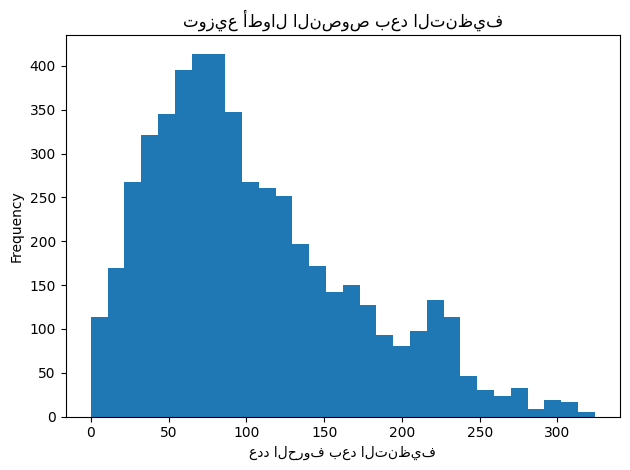

يمثل هذا الرسم مدى انتشار أطوال النصوص بين المراجعات، مما يساعد على فهم طبيعة البيانات.


In [ ]:
print("ملخص طول النصوص بعد التنظيف:")
display(df["text_len"].describe())

import matplotlib.pyplot as plt

# تعليق رسمي قبل الرسم
print("هذا الرسم يوضح توزيع أطوال المراجعات بعد عملية التنظيف للنصوص.")

ax = df["text_len"].plot(
    kind="hist",
    bins=30,
    title="توزيع أطوال النصوص بعد التنظيف"
)
ax.set_xlabel("عدد الحروف بعد التنظيف")
plt.tight_layout()
plt.show()

print("يمثل هذا الرسم مدى انتشار أطوال النصوص بين المراجعات، مما يساعد على فهم طبيعة البيانات.")


# تحويل التواريخ إلى كائنات زمنية ثم أشهر

إحصائية عدد المراجعات لكل شهر:


,review_month,عدد_المراجعات


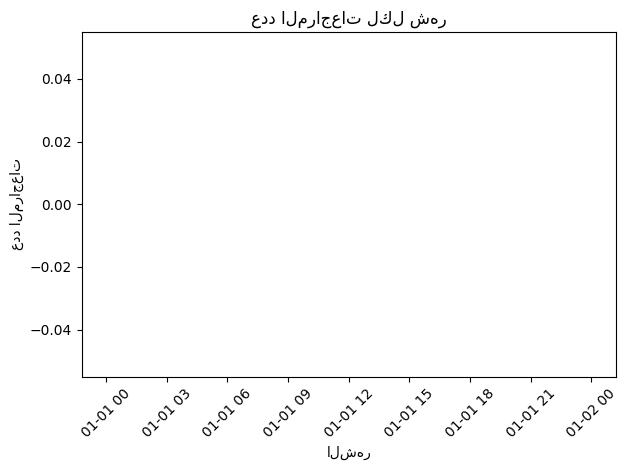

In [ ]:
import matplotlib.pyplot as plt

if "review_month" in df.columns:
    # حساب عدد المراجعات لكل شهر
    monthly_counts = (
        df.dropna(subset=["review_month"])
          .groupby("review_month")
          .size()
          .rename("عدد_المراجعات")
          .reset_index()
    )

    print("إحصائية عدد المراجعات لكل شهر:")
    display(monthly_counts.head())

    # رسم مخطط خطي يوضح عدد المراجعات لكل شهر
    plt.figure()
    plt.plot(monthly_counts["review_month"], monthly_counts["عدد_المراجعات"], marker='o')
    plt.title("عدد المراجعات لكل شهر")
    plt.xlabel("الشهر")
    plt.ylabel("عدد المراجعات")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("لم يتم العثور على عمود 'review_month'، لا يمكن رسم الإحصائيات الزمنية.")


# إحصاءات زمنية أساسية وعدّ المراجعات شهريًا

عدد المراجعات شهريًا:


,review_month,reviews_count


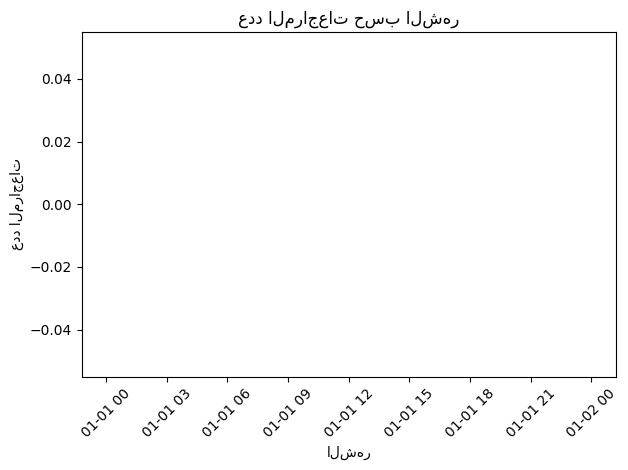

In [ ]:
if "review_month" in df.columns:
    monthly_counts = (df.dropna(subset=["review_month"])
                        .groupby("review_month")
                        .size()
                        .rename("reviews_count")
                        .reset_index())

    print("عدد المراجعات شهريًا:")
    display(monthly_counts.head())

    import matplotlib.pyplot as plt

    plt.figure()
    plt.plot(monthly_counts["review_month"], monthly_counts["reviews_count"])
    plt.title("عدد المراجعات حسب الشهر")
    plt.xlabel("الشهر")
    plt.ylabel("عدد المراجعات")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("لا يوجد عمود review_month. لا يمكن رسم الإحصاءات الزمنية.")


# useing llm

In [ ]:
!pip install transformers torch --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.1 MB/s eta 0:00:00


# تحميل النموذج وإجراء التحليل

In [ ]:
# اذا كنت على كولاب وتبي تبدأ من بيئة نظيفة، ثبت الحزم ذي قبل التشغيل:
# !pip install transformers torch accelerate --quiet

import math
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# ----- 1) نحمل نموذج تحليل المشاعر العربي -----
MODEL_NAME = "CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

# نفضّل تشغيله على الـ GPU إذا هو متوفر، وإلا نمشي على الـ CPU
device = 0 if torch.cuda.is_available() else -1

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=device,           # إذا فيه كرت شاشة يشتغل عليه، غير كذا على المعالج
)

# ----- 2) نحدد عمود النص المراد تحليله -----
text_col = "text_clean" if "text_clean" in df.columns else (
    "review_text" if "review_text" in df.columns else None
)
if text_col is None:
    raise ValueError("ما لقينا عمود للنص. المفترض يكون 'text_clean' أو 'review_text'.")

# ----- 3) نضبط الإعدادات قبل التشغيل -----
MAX_SAMPLES = None    # تقدر تجرب بسرعة على 500 مثلاً، وإذا تبي الكل خلّها None
BATCH_SIZE  = 32
MAX_LENGTH  = 256     # نقص النصوص الطويلة لهالطول عشان السرعة والذاكرة

# نجيب الفهارس اللي فيها نصوص فعليًا
valid_idx = df[df[text_col].notna()].index
if MAX_SAMPLES is not None:
    valid_idx = valid_idx[:MAX_SAMPLES]

# نجهّز النصوص
texts = df.loc[valid_idx, text_col].astype(str).fillna("").tolist()

# إذا ما فيه نصوص، نوقف ونبلغ
if len(texts) == 0:
    raise ValueError("ما فيه نصوص صالحة للتحليل.")

# ----- 4) نشغّل التحليل على دفعات -----
results_labels = []
for start in range(0, len(texts), BATCH_SIZE):
    batch = texts[start:start + BATCH_SIZE]
    # البايبلاين يدعم تحديد حجم الدفعة والقص التلقائي
    out = sentiment_pipeline(batch, truncation=True, max_length=MAX_LENGTH, batch_size=BATCH_SIZE)
    # المخرجات مثل: [{'label': 'POS', 'score': 0.97}, ...]
    results_labels.extend([o["label"] for o in out])

# ----- 5) نطبع التسميات إلى: positive / neutral / negative -----
def normalize_label(lbl: str) -> str:
    if not isinstance(lbl, str):
        return "neutral"
    l = lbl.strip().lower()
    # نماذج عربية كثيرة ترجع POS/NEG/NEU أو label_0/1/2
    if l in {"pos", "positive", "label_2"}:
        return "positive"
    if l in {"neg", "negative", "label_0"}:
        return "negative"
    if l in {"neu", "neutral", "label_1"}:
        return "neutral"
    # إن ما طابقت، نخليها حيادية
    return "neutral"

normalized = [normalize_label(x) for x in results_labels]

# ----- 6) نرجّع النتائج للـ DataFrame على نفس الفهارس -----
df.loc[valid_idx, "sentiment_model"] = normalized

# فحص سريع للتوزيع
print("Sentiment counts:\n", df["sentiment_model"].value_counts(dropna=False))


Device set to use cuda:0


Sentiment counts:
 sentiment_model
positive    3826
negative     891
neutral      335
Name: count, dtype: int64


# تحليل المشاعر شهريًا

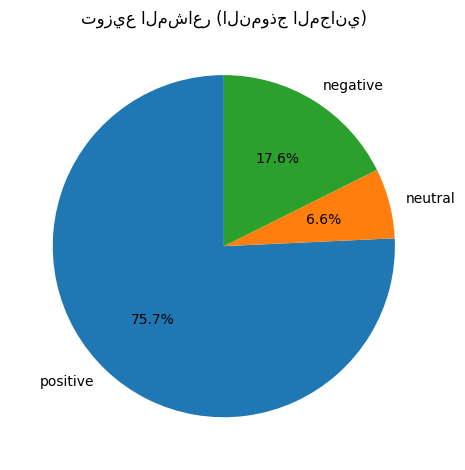

ما فيه بيانات 'review_month' أو 'sentiment_model' للتحليل الشهري.


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ننشئ مجلد الصور إذا ما كان موجود
os.makedirs("images", exist_ok=True)

# --- 1) رسم بياني دائري يوضح توزيع المشاعر ---
if "sentiment_model" in df.columns and df["sentiment_model"].notna().any():
    # نثبت ترتيب التصنيفات
    order = ["positive", "neutral", "negative"]
    counts = (df["sentiment_model"]
              .str.lower()
              .value_counts()
              .reindex(order, fill_value=0))

    if counts.sum() > 0:
        plt.figure()
        counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)
        plt.title("توزيع المشاعر (النموذج المجاني)")
        plt.ylabel("")
        plt.tight_layout()
        plt.savefig("images/sentiment_pie.png", dpi=150)
        plt.show()
    else:
        print("ما فيه قيم صالحة في 'sentiment_model' عشان نرسم المخطط الدائري.")
else:
    print("العمود 'sentiment_model' مفقود أو فاضي؛ نتخطى الرسم الدائري.")

# --- 2) اتجاه المشاعر شهريًا: نسبة كل شعور مع الوقت ---
if ("review_month" in df.columns
    and df["review_month"].notna().any()
    and "sentiment_model" in df.columns
    and df["sentiment_model"].notna().any()):

    # نتأكد أن عمود التاريخ من نوع تاريخي ومرتب حسب الشهر
    df["_month"] = pd.to_datetime(df["review_month"], errors="coerce")
    work = df.dropna(subset=["_month", "sentiment_model"]).copy()
    work["sentiment_model"] = work["sentiment_model"].str.lower()

    # نحسب عدد كل شعور لكل شهر
    monthly = (work.groupby(["_month", "sentiment_model"])
                    .size()
                    .reset_index(name="count"))
    monthly["total"] = monthly.groupby("_month")["count"].transform("sum")
    monthly["pct"] = np.where(monthly["total"] > 0, monthly["count"] / monthly["total"], 0.0)

    # نعمل Pivot مع ترتيب ثابت للأعمدة
    order = ["positive", "neutral", "negative"]
    pivot_pct = (monthly
                 .pivot(index="_month", columns="sentiment_model", values="pct")
                 .reindex(columns=order)
                 .fillna(0.0)
                 .sort_index())

    # نحفظ الجدول الشهري إذا حبّينا
    out_csv = "data/monthly_sentiment_share.csv"
    os.makedirs("data", exist_ok=True)
    pivot_pct.to_csv(out_csv)
    print(f"تم حفظ نسبة المشاعر الشهرية في: {out_csv}")

    # نرسم الخطوط إذا فيه بيانات
    if not pivot_pct.empty:
        plt.figure()
        for col in pivot_pct.columns:
            plt.plot(pivot_pct.index, pivot_pct[col], marker="o", label=col)
        plt.title("نسبة المشاعر مع الوقت (شهري، النموذج المجاني)")
        plt.xlabel("الشهر")
        plt.ylabel("النسبة")
        plt.xticks(rotation=45)
        plt.legend(title="نوع الشعور")
        plt.tight_layout()
        plt.savefig("images/sentiment_over_time.png", dpi=150)
        plt.show()
    else:
        print("ما فيه بيانات للرسم الشهري.")
else:
    print("ما فيه بيانات 'review_month' أو 'sentiment_model' للتحليل الشهري.")


# WordCloud للمراجعات الإيجابية والسلبية

### debug

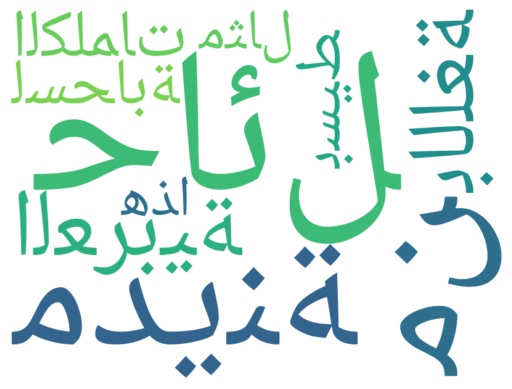

In [ ]:
# 1) Deps + font
!pip install arabic-reshaper python-bidi --quiet
!wget -q https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoNaskhArabic/NotoNaskhArabic-Regular.ttf -O /tmp/NotoNaskhArabic-Regular.ttf

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

font_path = "/tmp/NotoNaskhArabic-Regular.ttf"

# 2) Use NORMAL Arabic text (not reversed, not presentation forms)
text = "هذا مثال بسيط لسحابة الكلمات باللغة العربية من مدينة حائل"

# 3) Shape + bidi (this is the right way)
reshaped = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped)

# 4) WordCloud
wc = WordCloud(font_path=font_path, width=800, height=600, background_color="white").generate(bidi_text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
# ==========================================================
# سحابات كلمات عربية لكل عيادة (إيجابي/سلبي) مع دعم حائل
# ملاحظة: لا نُعدّل نصوص df إطلاقًا؛ كل التهيئة للعرض فقط.
# ==========================================================

# 1) تثبيت دعم العربية والخط (مرة لكل جلسة)
!pip install arabic-reshaper python-bidi --quiet

import os, re, sys, pathlib, subprocess

def ensure_arabic_font():
    """التأكد من وجود خط عربي مناسب، وإن لم يوجد يتم تنزيل Noto Naskh Arabic."""
    candidates = [
        "/usr/share/fonts/truetype/amiri/Amiri-Regular.ttf",
        "/usr/share/fonts/truetype/noto/NotoNaskhArabic-Regular.ttf",
        "/root/.local/share/fonts/NotoNaskhArabic-Regular.ttf",
        "C:/Windows/Fonts/arial.ttf",
    ]
    for p in candidates:
        if os.path.exists(p):
            return p
    # تنزيل Noto Naskh Arabic
    os.makedirs("/root/.local/share/fonts", exist_ok=True)
    url = "https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoNaskhArabic/NotoNaskhArabic-Regular.ttf"
    out = "/root/.local/share/fonts/NotoNaskhArabic-Regular.ttf"
    try:
        subprocess.run(["wget", "-q", "-O", out, url], check=True)
        subprocess.run(["fc-cache", "-fv"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    except Exception as e:
        print("تعذّر تنزيل الخط تلقائيًا:", e)
    return out if os.path.exists(out) else None

font_path = ensure_arabic_font()

# 2) الاستيرادات
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

# 3) تهيئة الخط العربي لعناوين matplotlib (اختياري)
if font_path and os.path.exists(font_path):
    try:
        prop = font_manager.FontProperties(fname=font_path)
        plt.rcParams["font.family"] = prop.get_name()
    except Exception:
        pass
else:
    print("تنبيه: لم يتم العثور على خط عربي. قد لا تظهر العناوين العربية بشكل صحيح.")

# 4) إنشاء مجلدات الإخراج
os.makedirs("images", exist_ok=True)
base_wc_dir = pathlib.Path("images/wordclouds")
base_wc_dir.mkdir(parents=True, exist_ok=True)

# 5) اختيار عمود النصوص
text_col = None
for c in ["text_clean", "review_text", "translated_text", "text"]:
    if c in df.columns:
        text_col = c
        break
if text_col is None:
    raise ValueError("لم يتم العثور على عمود نصوص. المتوقّع: text_clean أو review_text أو translated_text أو text.")

# 6) تحديد عمود العيادة
clinic_col = None
for c in ["_clinic_en", "clinic_name", "branch", "hospital", "provider"]:
    if c in df.columns:
        clinic_col = c
        break
if clinic_col is None:
    raise ValueError("لم يتم العثور على عمود لاسم العيادة. المتوقّع: clinic_name أو ما شابه.")

# 7) التأكد من عمود المشاعر (إن لم يوجد سننشئ سحابة عامة لكل عيادة)
has_sent = ("sentiment_model" in df.columns) and df["sentiment_model"].notna().any()

# 8) فلترة اختيارية لبيانات حائل إن توفّر عمود مدينة/منطقة يحتوي "حائل"
def filter_hail_if_possible(dataframe: pd.DataFrame) -> pd.DataFrame:
    candidates = [c for c in dataframe.columns if c.lower() in ("city", "region", "province", "area", "location")]
    for c in candidates:
        if dataframe[c].astype(str).str.contains("حائل", case=False, na=False).any():
            return dataframe[dataframe[c].astype(str).str.contains("حائل", case=False, na=False)]
    return dataframe

df_hail = filter_hail_if_possible(df.copy())
if df_hail.shape[0] == 0:
    print("لم يتم العثور على صفوف متعلّقة بحائل وفق الأعمدة المتاحة. سيتم العمل على كامل البيانات.")
    df_hail = df.copy()

# 9) قائمة كلمات توقف عربية أساسية
AR_STOPWORDS = set([
    "في","من","على","عن","الى","إلى","و","ما","لا","لم","لن","هذا","هذه","ذلك","تلك",
    "هو","هي","هم","هن","أنا","نحن","تم","كان","كانت","لقد","قد","كل","كما","أو","او","إن","أن","بين","مع","ثم","حتى"
])

# 10) تطبيع وتنظيف عربي مبسّط (لا نعدّل df)
AR_DIACRITICS = re.compile(r"[\u0610-\u061A\u064B-\u065F\u0670\u06D6-\u06ED\u0640]")
AR_PUNCT     = re.compile(r"[^0-9A-Za-z\u0621-\u064A\u0660-\u0669\s]+")

def normalize_arabic_clean(s: str) -> str:
    if not isinstance(s, str):
        return ""
    s = AR_DIACRITICS.sub("", s)
    s = re.sub("[إأآا]", "ا", s)
    s = re.sub("ى", "ي", s)
    s = re.sub("ؤ", "و", s)
    s = re.sub("ئ", "ي", s)
    # نُبقي "ة" كما هي
    s = re.sub(r"http\S+|www\.\S+", " ", s)
    s = AR_PUNCT.sub(" ", s)
    s = re.sub(r"\s+", " ", s).strip()
    tokens = [w for w in s.split() if w not in AR_STOPWORDS]
    return " ".join(tokens)

# تحذير لو النصوص فيها Arabic Presentation Forms (تعني أنها مقلوبة/مشكّلة مسبقًا)
def has_presentation_forms(s: str) -> bool:
    return any('\uFB50' <= ch <= '\uFDFF' or '\uFE70' <= ch <= '\uFEFF' for ch in s)

def prepare_ar_text(texts):
    """
    تجهيز نصوص لسحابة الكلمات:
    - تنظيف خفيف
    - arabic_reshaper + bidi للعرض فقط
    مهم: لا نكتب أي تغيير إلى df.
    """
    joined_raw = " ".join(str(t) for t in texts if isinstance(t, str))
    if has_presentation_forms(joined_raw):
        print("تحذير: توجد نصوص عربية بشكل Presentation Forms. يُفضّل استخدام حروف عربية عادية غير مقلوبة.")

    joined = " ".join(normalize_arabic_clean(t or "") for t in texts if isinstance(t, str))
    if not joined.strip():
        return ""
    reshaped = arabic_reshaper.reshape(joined)   # تشكيل للأحرف
    return get_display(reshaped)                  # اتجاه العرض من اليمين لليسار

# 11) دالة مساعدة لإنشاء اسم مجلد آمن
def safe_name(s: str) -> str:
    s = str(s)
    s = re.sub(r"[\\/:\*\?\"<>\|]", "_", s)
    s = re.sub(r"\s+", "_", s).strip("_")
    return s if s else "clinic"

# ------- ضمان عدم تعديل نصوص df -------
_original_series = df[text_col].copy(deep=True)

# 12) توليد السحابات لكل عيادة
generated = []
for clinic, g in df_hail.groupby(clinic_col, dropna=False):
    clinic_label = clinic if pd.notna(clinic) else "عيادة غير معروفة"
    clinic_dir = base_wc_dir / safe_name(clinic_label)
    clinic_dir.mkdir(parents=True, exist_ok=True)

    if has_sent:
        pos_texts = g.loc[g["sentiment_model"].astype(str).str.lower()=="positive", text_col].dropna().astype(str).tolist()
        neg_texts = g.loc[g["sentiment_model"].astype(str).str.lower()=="negative", text_col].dropna().astype(str).tolist()

        pos_ready = prepare_ar_text(pos_texts)  # عرض فقط
        neg_ready = prepare_ar_text(neg_texts)  # عرض فقط

        if pos_ready.strip():
            wc_pos = WordCloud(width=1000, height=700, background_color="white", font_path=font_path).generate(pos_ready)
            plt.figure()
            plt.imshow(wc_pos, interpolation="bilinear"); plt.axis("off")
            plt.title(f"سحابة كلمات (إيجابي) - {clinic_label}")
            plt.tight_layout()
            outp = clinic_dir / "wordcloud_positive.png"
            plt.savefig(outp.as_posix(), dpi=150); plt.close()
            generated.append(str(outp))

        if neg_ready.strip():
            wc_neg = WordCloud(width=1000, height=700, background_color="white", font_path=font_path).generate(neg_ready)
            plt.figure()
            plt.imshow(wc_neg, interpolation="bilinear"); plt.axis("off")
            plt.title(f"سحابة كلمات (سلبي) - {clinic_label}")
            plt.tight_layout()
            outn = clinic_dir / "wordcloud_negative.png"
            plt.savefig(outn.as_posix(), dpi=150); plt.close()
            generated.append(str(outn))
    else:
        # لا يوجد عمود مشاعر: سحابة عامة
        all_texts = g[text_col].dropna().astype(str).tolist()
        all_ready = prepare_ar_text(all_texts)  # عرض فقط
        if all_ready.strip():
            wc_all = WordCloud(width=1000, height=700, background_color="white", font_path=font_path).generate(all_ready)
            plt.figure()
            plt.imshow(wc_all, interpolation="bilinear"); plt.axis("off")
            plt.title(f"سحابة كلمات (عام) - {clinic_label}")
            plt.tight_layout()
            outa = clinic_dir / "wordcloud_all.png"
            plt.savefig(outa.as_posix(), dpi=150); plt.close()
            generated.append(str(outa))

# 13) تلخيص المخرجات + تحقق أن النص الأصلي لم يتغيّر
if generated:
    print("تم إنشاء سحابات الكلمات للعيادات. أمثلة مسارات الملفات:")
    for p in generated[:10]:
        print("-", p)
    print(f"الإجمالي المنشأ: {len(generated)} ملفاً.")
else:
    print("لم يتم توليد أي سحابة كلمات. تحقق من وجود نصوص مناسبة أو عمود المشاعر.")

# تحقق صارم: لا تغيير على عمود النص الأصلي
try:
    pd.testing.assert_series_equal(_original_series, df[text_col], check_names=False, check_dtype=False)
except AssertionError:
    raise AssertionError("تم تعديل عمود النص الأصلي بالخطأ. يجب عدم تعديل df أثناء توليد السحابات.")


تم إنشاء سحابات الكلمات للعيادات. أمثلة مسارات الملفات:
- images/wordclouds/Clinic_1/wordcloud_positive.png
- images/wordclouds/Clinic_1/wordcloud_negative.png
- images/wordclouds/Clinic_10/wordcloud_positive.png
- images/wordclouds/Clinic_10/wordcloud_negative.png
- images/wordclouds/Clinic_11/wordcloud_positive.png
- images/wordclouds/Clinic_11/wordcloud_negative.png
- images/wordclouds/Clinic_12/wordcloud_positive.png
- images/wordclouds/Clinic_12/wordcloud_negative.png
- images/wordclouds/Clinic_13/wordcloud_positive.png
- images/wordclouds/Clinic_13/wordcloud_negative.png
الإجمالي المنشأ: 35 ملفاً.


# استخراج جوانب بسيطة (Aspects) بالكلمات المفتاحية + الرسم

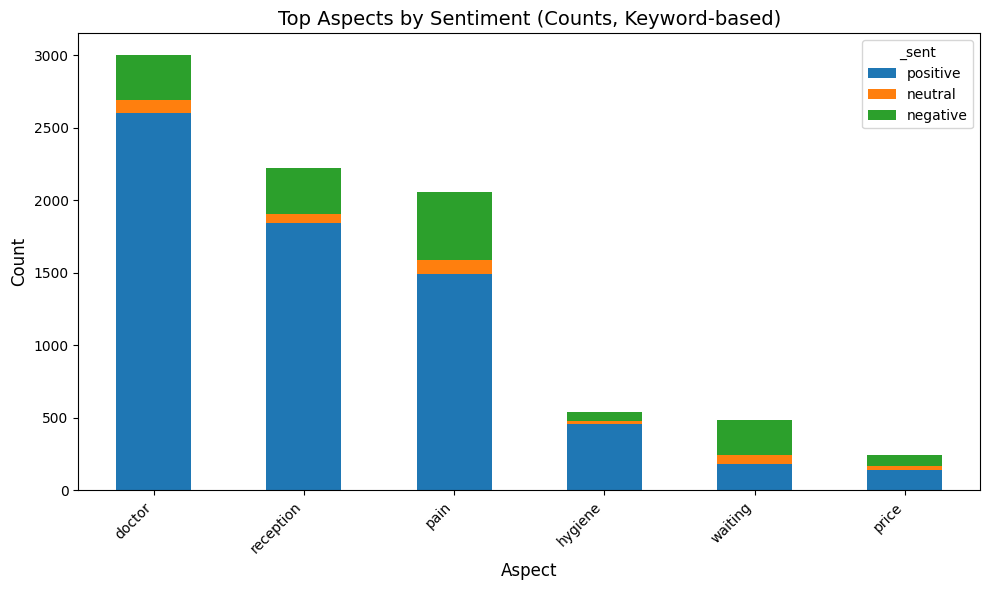

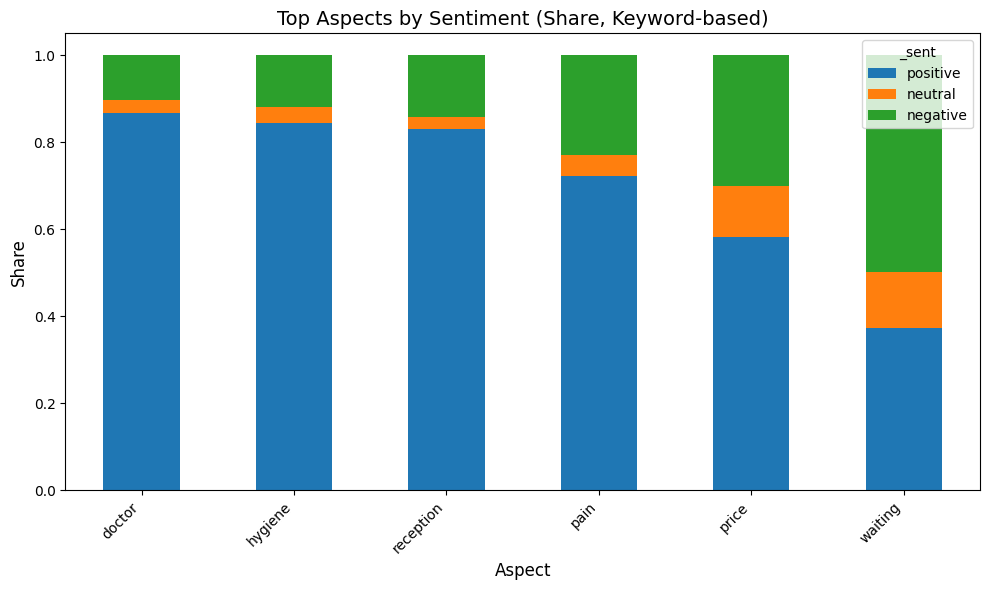

Saved: data/aspects_by_sentiment_top10.csv


In [63]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# إنشاء مجلدات لحفظ الصور والبيانات
os.makedirs("images", exist_ok=True)
os.makedirs("data", exist_ok=True)

# اختيار عمود النصوص
text_col = "text_clean" if "text_clean" in df.columns else (
    "review_text" if "review_text" in df.columns else None
)
if text_col is None:
    raise ValueError("لا يوجد عمود نصوص. يجب أن يكون 'text_clean' أو 'review_text'.")

# التحقق من عمود المشاعر
if "sentiment_model" not in df.columns or df["sentiment_model"].isna().all():
    raise ValueError("عمود sentiment_model مطلوب. قم بتشغيل نموذج المشاعر أولاً.")

# دالة لتطبيع النصوص العربية
AR_PUNCT = r"[^ء-يA-Za-z0-9\s]+"
def normalize_arabic(s: str) -> str:
    if not isinstance(s, str):
        return ""
    s = re.sub(r"http\S+|www\.\S+", " ", s)  # إزالة الروابط
    s = re.sub(AR_PUNCT, " ", s)  # إزالة الرموز
    s = re.sub("[إأآا]", "ا", s)
    s = re.sub("ى", "ي", s)
    s = re.sub("ؤ", "و", s)
    s = re.sub("ئ", "ي", s)
    s = re.sub("ة", "ه", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

# كلمات مفتاحية للجوانب
ASPECTS = {
    "price":    {"سعر","اسعار","غالي","رخيص","تكلفه","تكلفة"},
    "waiting":  {"موعد","مواعيد","انتظار","تأخير","تاخير","زحمه","ازدحام"},
    "reception":{"استقبال","موظف","موظفين","تعامل","خدمه","خدمة"},
    "doctor":   {"طبيب","دكتور","دكتوره","طبيبه","خبره","مهاره","احتراف","تشخيص"},
    "pain":     {"الم","يوجع","وجع","تحسس","مخدر","بنج","بدون الم"},
    "hygiene":  {"نظافه","نظافة","تعقيم","ادوات","غرفه","غرفة","نظيف"}
}

# دالة لاكتشاف الجوانب في النصوص
def detect_aspects(text):
    text = normalize_arabic(text)
    found = set()
    for asp, vocab in ASPECTS.items():
        if any(w in text for w in vocab):
            found.add(asp)
    return list(found)

# تجهيز الأعمدة
df["_aspects"] = df[text_col].fillna("").apply(detect_aspects)
df["_sent"]    = df["sentiment_model"].astype(str).str.lower()

# تحويل البيانات إلى صفوف منفصلة
exploded = df.explode("_aspects").dropna(subset=["_aspects"])
if exploded.empty:
    raise ValueError("لم يتم اكتشاف أي جوانب. جرب توسيع قائمة الكلمات أو فحص جودة النص.")

# حساب عدد التكرارات
aspect_counts = (
    exploded.groupby(["_aspects","_sent"])
            .size()
            .reset_index(name="count")
)

# تحديد أفضل 10 جوانب
top_aspects = (
    aspect_counts.groupby("_aspects")["count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)
top_df = aspect_counts[aspect_counts["_aspects"].isin(top_aspects)].copy()

# إنشاء جداول محورية
pivot_cnt = top_df.pivot(index="_aspects", columns="_sent", values="count").fillna(0)
pivot_cnt = pivot_cnt.reindex(columns=["positive","neutral","negative"], fill_value=0)
pivot_pct = pivot_cnt.div(pivot_cnt.sum(axis=1), axis=0).fillna(0)

# رسم عدد الجوانب
ax = pivot_cnt.sort_values(pivot_cnt.columns.tolist(), ascending=False).plot(
    kind="bar", stacked=True, figsize=(10,6)
)
ax.set_title("Top Aspects by Sentiment (Counts, Keyword-based)", fontsize=14)
ax.set_xlabel("Aspect", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("images/aspects_by_sentiment_counts.png", dpi=150)
plt.show()

# رسم النسب المئوية
ax = pivot_pct.sort_values(["positive","neutral","negative"], ascending=False).plot(
    kind="bar", stacked=True, figsize=(10,6)
)
ax.set_title("Top Aspects by Sentiment (Share, Keyword-based)", fontsize=14)
ax.set_xlabel("Aspect", fontsize=12)
ax.set_ylabel("Share", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("images/aspects_by_sentiment_share.png", dpi=150)
plt.show()

# حفظ النتائج في ملف CSV
tidy_out = top_df.rename(columns={"_aspects":"aspect","_sent":"sentiment"})
tidy_out.to_csv("data/aspects_by_sentiment_top10.csv", index=False)
print("Saved:", "data/aspects_by_sentiment_top10.csv")

# Clinic Benchmarking

In [ ]:
!apt-get install -y fonts-amiri

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Amiri'


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts-amiri


Saved clinic name mapping: data/clinic_label_mapping.csv
Saved clinic leaderboard: data/clinic_benchmarking.csv


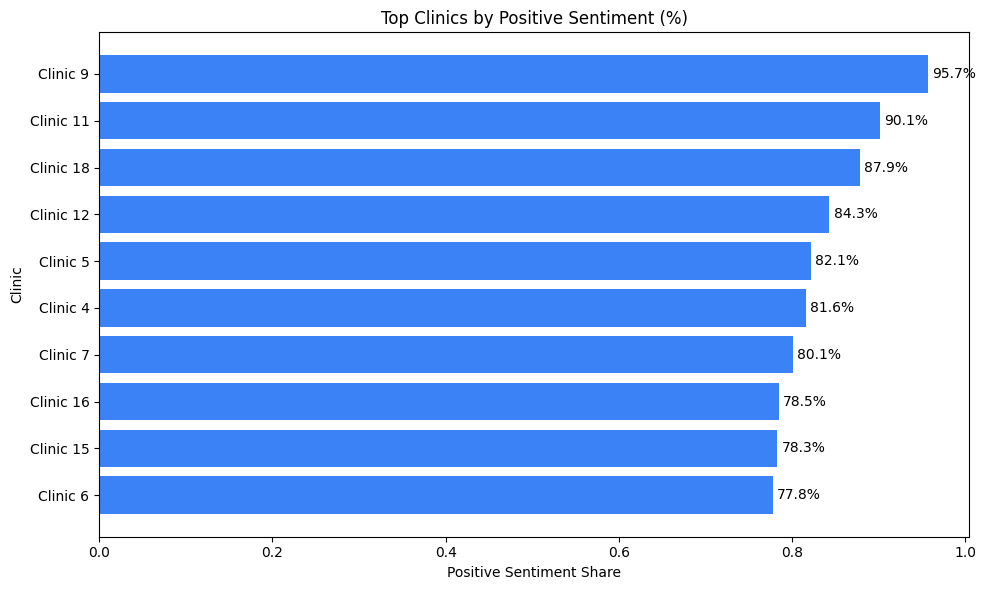

Saved aspects counts: data/top_clinics_aspects_counts.csv


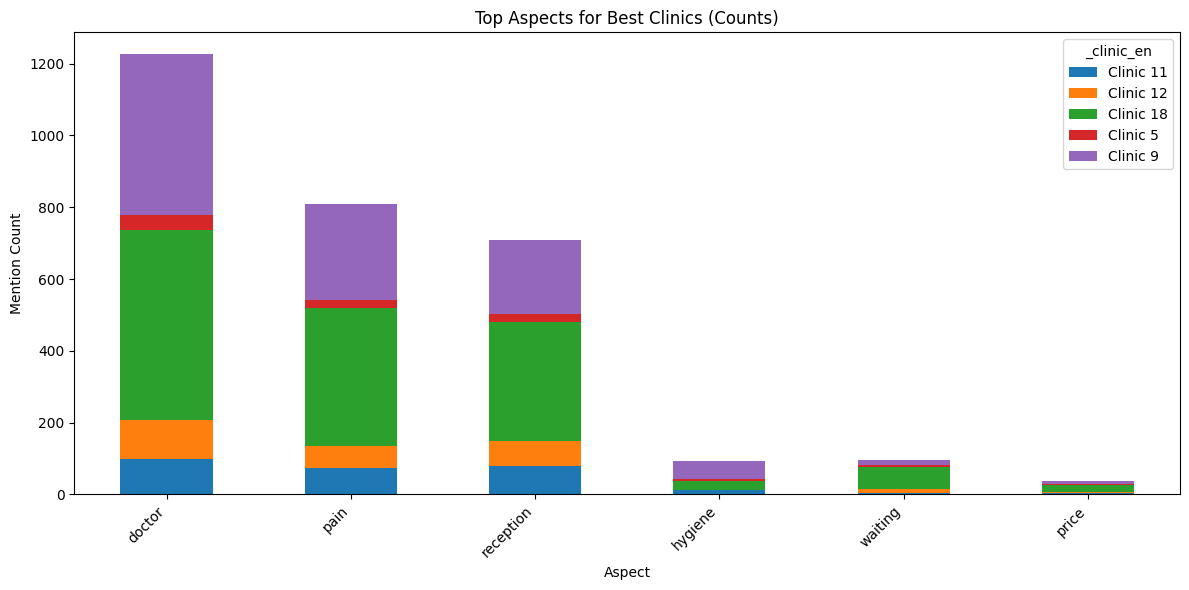

Benchmarking complete. English charts under images/, tables under data/


In [64]:
# ===============================
# Clinic Benchmarking (Sentiment & Aspects) — English-only plots
# ===============================
import os
import pandas as pd
import matplotlib.pyplot as plt

# Use default Matplotlib font; no Arabic fonts
plt.rcParams["font.family"] = "DejaVu Sans"

# Ensure folders
os.makedirs("images", exist_ok=True)
os.makedirs("data", exist_ok=True)

# 1) Validate required columns
required_cols = {"clinic_name", "sentiment_model", "aspects"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Missing columns: {missing}")

# 2) Normalize sentiment to lower-case strings
df = df.copy()
df["_sent"] = df["sentiment_model"].astype(str).str.lower()

# 3) Build an English-only clinic label mapping (Clinic 1, Clinic 2, ...)
unique_clinics = df["clinic_name"].fillna("Unknown Clinic").astype(str).unique().tolist()
clinic_map = {orig: f"Clinic {i+1}" for i, orig in enumerate(unique_clinics)}
df["_clinic_en"] = df["clinic_name"].fillna("Unknown Clinic").astype(str).map(clinic_map)

# Save mapping for reference
map_path = "data/clinic_label_mapping.csv"
pd.DataFrame({"clinic_name_original": list(clinic_map.keys()),
              "clinic_name_english": list(clinic_map.values())}).to_csv(map_path, index=False, encoding="utf-8-sig")
print(f"Saved clinic name mapping: {map_path}")

# 4) Compute per-clinic metrics
clinic_stats = (
    df.groupby("_clinic_en", dropna=False)
      .agg(
          total_reviews=("_sent", "size"),
          positive_reviews=("_sent", lambda x: (x == "positive").sum()),
          neutral_reviews=("_sent",  lambda x: (x == "neutral").sum()),
          negative_reviews=("_sent",  lambda x: (x == "negative").sum()),
      )
)

clinic_stats["positive_pct"] = clinic_stats["positive_reviews"] / clinic_stats["total_reviews"]
clinic_stats["negative_pct"] = clinic_stats["negative_reviews"] / clinic_stats["total_reviews"]

# Optional: filter by minimum number of reviews per clinic
MIN_REVIEWS = 10  # adjust as needed
clinic_stats_filtered = clinic_stats[clinic_stats["total_reviews"] >= MIN_REVIEWS].copy()
if clinic_stats_filtered.empty:
    clinic_stats_filtered = clinic_stats.copy()  # fallback

# Sort by positive percentage
clinic_stats_sorted = clinic_stats_filtered.sort_values("positive_pct", ascending=False)

# Save leaderboard (English labels)
leaderboard_path = "data/clinic_benchmarking.csv"
clinic_stats_sorted.to_csv(leaderboard_path, encoding="utf-8-sig")
print(f"Saved clinic leaderboard: {leaderboard_path}")

# 5) Bar chart: Top N clinics by positive sentiment share (English)
top_n = 10
top_df = clinic_stats_sorted.head(top_n).copy()

plt.figure(figsize=(10, 6))
bars = plt.barh(top_df.index, top_df["positive_pct"], color="#3b82f6")
plt.title("Top Clinics by Positive Sentiment (%)")
plt.xlabel("Positive Sentiment Share")
plt.ylabel("Clinic")
plt.gca().invert_yaxis()
for b in bars:
    width = b.get_width()
    plt.text(width + 0.005, b.get_y() + b.get_height()/2, f"{width*100:.1f}%", va="center")
plt.tight_layout()
plt.savefig("images/top_clinics_sentiment.png", dpi=150)
plt.show()

# 6) Aspect analysis for the best clinics (Top 5) — English
top_clinics_en = clinic_stats_sorted.head(5).index.tolist()
df_top = df[df["_clinic_en"].isin(top_clinics_en)].explode("aspects")
df_top = df_top.dropna(subset=["aspects"])

if df_top.empty:
    print("No aspects found for the top clinics.")
else:
    # Count aspects per (English) clinic
    aspect_counts = (
        df_top.groupby(["_clinic_en", "aspects"])
              .size()
              .reset_index(name="count")
    )

    # Choose top K aspects overall among top clinics
    K = 10
    top_aspects = (
        aspect_counts.groupby("aspects")["count"]
        .sum()
        .sort_values(ascending=False)
        .head(K)
        .index.tolist()
    )
    top_aspects_df = aspect_counts[aspect_counts["aspects"].isin(top_aspects)].copy()

    # Pivot to clinic x aspect matrix (fill missing with 0)
    pivot_aspects = (
        top_aspects_df.pivot(index="aspects", columns="_clinic_en", values="count")
                      .fillna(0)
                      .sort_values(by=top_clinics_en, ascending=False, axis=0)
    )

    # Save tidy aspects table (English clinic labels)
    aspects_csv = "data/top_clinics_aspects_counts.csv"
    top_aspects_df.rename(columns={"_clinic_en":"clinic_en"}).to_csv(aspects_csv, index=False, encoding="utf-8-sig")
    print(f"Saved aspects counts: {aspects_csv}")

    # Plot stacked bar (aspects on x, counts stacked by clinic) — English
    ax = pivot_aspects.plot(kind="bar", stacked=True, figsize=(12, 6))
    ax.set_title("Top Aspects for Best Clinics (Counts)")
    ax.set_xlabel("Aspect")
    ax.set_ylabel("Mention Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("images/top_clinics_aspects.png", dpi=150)
    plt.show()

print("Benchmarking complete. English charts under images/, tables under data/")


# Merge original clinic names into the leaderboard

In [ ]:
import pandas as pd

# Load leaderboard and mapping
leaderboard_path = "data/clinic_benchmarking.csv"
mapping_path     = "data/clinic_label_mapping.csv"

leaderboard = pd.read_csv(leaderboard_path, index_col=0)  # index is _clinic_en
leaderboard.index.name = "_clinic_en"
mapping = pd.read_csv(mapping_path)

# Invert mapping: english -> original
eng2orig = dict(zip(mapping["clinic_name_english"], mapping["clinic_name_original"]))

# Add original names
leaderboard = leaderboard.reset_index()
leaderboard["clinic_name_original"] = leaderboard["_clinic_en"].map(eng2orig)

# Reorder columns
cols = ["clinic_name_original", "_clinic_en", "total_reviews", "positive_reviews",
        "neutral_reviews", "negative_reviews", "positive_pct", "negative_pct"]
cols = [c for c in cols if c in leaderboard.columns]
leaderboard = leaderboard[cols]

# Save combined table
leaderboard_out = "data/clinic_benchmarking_with_original.csv"
leaderboard.to_csv(leaderboard_out, index=False, encoding="utf-8-sig")
display(leaderboard.head(10))
print("Saved:", leaderboard_out)


,clinic_name_original,_clinic_en,total_reviews,positive_reviews,neutral_reviews,negative_reviews,positive_pct,negative_pct
0,عيادات درة العالمي لطب الاسنان,Clinic 9,508,488,9,11,0.960630,0.021654
1,مجمع علم الرازي الطبي العام,Clinic 11,152,137,5,10,0.901316,0.065789
2,Alghassab Dental Clinics,Clinic 18,741,653,41,47,0.881242,0.063428
3,المهيدب لطب الاسنان حائل,Clinic 12,153,128,7,18,0.836601,0.117647
4,عيادة د.توث DR.TOOTH CLINIC,Clinic 4,152,123,13,16,0.809211,0.105263
5,مجمع عيادات طابة دنت لطب الأسنان - حائل,Clinic 5,84,67,9,8,0.797619,0.095238
6,صفوة المهيدب لطب الأسنان حائل,Clinic 7,341,271,22,48,0.794721,0.140762
7,عيادات عاجي لطب وتقويم وزراعة الأسنان - فرع حائل,Clinic 16,469,371,22,76,0.791045,0.162047
8,مجمع المهيدب لطب الأسنان,Clinic 15,447,352,20,75,0.787472,0.167785
9,المهيدب لطب الاسنان,Clinic 6,18,14,4,0,0.777778,0.000000


Saved: data/clinic_benchmarking_with_original.csv


# Rank clinics by each aspect

In [ ]:
import pandas as pd
import numpy as np

# Ensure required columns exist
required = {"_clinic_en", "_sent", "aspects"}
if not required.issubset(df.columns):
    raise ValueError(f"Missing required columns in df: {required - set(df.columns)}")

def rank_clinics_by_aspect(df, aspect_name, min_reviews=5):
    # Keep only rows that mention the aspect
    dfa = df[df["aspects"].apply(lambda a: aspect_name in a if isinstance(a, list) else False)].copy()
    if dfa.empty:
        return pd.DataFrame(columns=["clinic_name_original","_clinic_en","aspect_reviews",
                                     "positive_pct","negative_pct"]).assign(note="No reviews for this aspect")

    # Aggregate sentiment for this aspect
    grp = (dfa.groupby("_clinic_en")["_sent"]
              .value_counts()
              .unstack(fill_value=0)
              .rename_axis(index="_clinic_en", columns="sentiment")
              .reset_index())
    for col in ["positive","neutral","negative"]:
        if col not in grp.columns:
            grp[col] = 0

    grp["aspect_reviews"] = grp[["positive","neutral","negative"]].sum(axis=1)
    grp = grp[grp["aspect_reviews"] >= min_reviews]  # filter by minimum reviews for reliability
    if grp.empty:
        return pd.DataFrame(columns=["clinic_name_original","_clinic_en","aspect_reviews",
                                     "positive_pct","negative_pct"]).assign(note="Insufficient reviews after filtering")

    grp["positive_pct"] = grp["positive"] / grp["aspect_reviews"]
    grp["negative_pct"] = grp["negative"] / grp["aspect_reviews"]

    # Map back original names
    mapping = pd.read_csv("data/clinic_label_mapping.csv")
    eng2orig = dict(zip(mapping["clinic_name_english"], mapping["clinic_name_original"]))
    grp["clinic_name_original"] = grp["_clinic_en"].map(eng2orig)

    # Order by positive share
    grp = grp.sort_values("positive_pct", ascending=False)
    return grp[["clinic_name_original","_clinic_en","aspect_reviews","positive_pct","negative_pct"]]

# Example: rank for key aspects (adjust names to match your extracted aspects)
for asp in ["hygiene","waiting","price","doctor","reception","pain"]:
    print(f"\n=== Aspect: {asp} ===")
    display(rank_clinics_by_aspect(df, asp, min_reviews=5).head(10))



=== Aspect: hygiene ===


sentiment,clinic_name_original,_clinic_en,aspect_reviews,positive_pct,negative_pct
2,مجمع علم الرازي الطبي العام,Clinic 11,11,1.000000,0.000000
8,Alghassab Dental Clinics,Clinic 18,25,1.000000,0.000000
10,عيادة د.توث DR.TOOTH CLINIC,Clinic 4,13,1.000000,0.000000
11,مجمع عيادات طابة دنت لطب الأسنان - حائل,Clinic 5,5,1.000000,0.000000
14,عيادات درة العالمي لطب الاسنان,Clinic 9,50,0.960000,0.040000
7,عيادات عاجي لطب وتقويم وزراعة الأسنان - فرع حائل,Clinic 16,5,0.800000,0.200000
5,مجمع الماس الطبي المتخصص لطب الاسنان,Clinic 14,7,0.571429,0.285714
13,مجمع درة رام الطبي,Clinic 8,9,0.555556,0.333333
6,مجمع المهيدب لطب الأسنان,Clinic 15,9,0.555556,0.333333
1,مجمع رويال الطبي جلديه وتجميل وأسنان,Clinic 10,21,0.523810,0.380952



=== Aspect: waiting ===


sentiment,clinic_name_original,_clinic_en,aspect_reviews,positive_pct,negative_pct
16,عيادات درة العالمي لطب الاسنان,Clinic 9,14,0.857143,0.142857
12,عيادة د.توث DR.TOOTH CLINIC,Clinic 4,16,0.812500,0.125000
9,Alghassab Dental Clinics,Clinic 18,62,0.741935,0.145161
8,مجمع نوفا لطب الأسنان,Clinic 17,34,0.676471,0.235294
3,المهيدب لطب الاسنان حائل,Clinic 12,11,0.545455,0.454545
13,مجمع عيادات طابة دنت لطب الأسنان - حائل,Clinic 5,5,0.400000,0.400000
14,صفوة المهيدب لطب الأسنان حائل,Clinic 7,15,0.333333,0.466667
7,عيادات عاجي لطب وتقويم وزراعة الأسنان - فرع حائل,Clinic 16,51,0.294118,0.588235
0,مجمع التخصيص لطب و جراحة الفم و الأسنان الطبي ...,Clinic 1,65,0.246154,0.569231
1,مجمع رويال الطبي جلديه وتجميل وأسنان,Clinic 10,82,0.231707,0.597561



=== Aspect: price ===


sentiment,clinic_name_original,_clinic_en,aspect_reviews,positive_pct,negative_pct
16,عيادات درة العالمي لطب الاسنان,Clinic 9,9,0.888889,0.000000
15,مجمع درة رام الطبي,Clinic 8,12,0.833333,0.083333
5,مجمع المهيدب لطب الأسنان,Clinic 15,19,0.736842,0.210526
7,مجمع نوفا لطب الأسنان,Clinic 17,5,0.600000,0.200000
14,صفوة المهيدب لطب الأسنان حائل,Clinic 7,7,0.571429,0.285714
4,مجمع الماس الطبي المتخصص لطب الاسنان,Clinic 14,6,0.500000,0.333333
8,Alghassab Dental Clinics,Clinic 18,20,0.400000,0.300000
6,عيادات عاجي لطب وتقويم وزراعة الأسنان - فرع حائل,Clinic 16,11,0.363636,0.636364
0,مجمع التخصيص لطب و جراحة الفم و الأسنان الطبي ...,Clinic 1,18,0.277778,0.666667
1,مجمع رويال الطبي جلديه وتجميل وأسنان,Clinic 10,22,0.227273,0.636364



=== Aspect: doctor ===


sentiment,clinic_name_original,_clinic_en,aspect_reviews,positive_pct,negative_pct
17,عيادات درة العالمي لطب الاسنان,Clinic 9,447,0.968680,0.017897
2,مجمع علم الرازي الطبي العام,Clinic 11,100,0.940000,0.040000
14,المهيدب لطب الاسنان,Clinic 6,14,0.928571,0.000000
3,المهيدب لطب الاسنان حائل,Clinic 12,108,0.925926,0.055556
9,Alghassab Dental Clinics,Clinic 18,530,0.916981,0.052830
12,عيادة د.توث DR.TOOTH CLINIC,Clinic 4,104,0.913462,0.057692
8,مجمع نوفا لطب الأسنان,Clinic 17,170,0.905882,0.070588
15,صفوة المهيدب لطب الأسنان حائل,Clinic 7,255,0.901961,0.066667
11,مجمع زين لطب و تقويم الأسنان,Clinic 3,84,0.880952,0.107143
7,عيادات عاجي لطب وتقويم وزراعة الأسنان - فرع حائل,Clinic 16,375,0.880000,0.106667



=== Aspect: reception ===


sentiment,clinic_name_original,_clinic_en,aspect_reviews,positive_pct,negative_pct
3,المهيدب لطب الاسنان حائل,Clinic 12,70,0.985714,0.000000
17,عيادات درة العالمي لطب الاسنان,Clinic 9,207,0.975845,0.019324
9,Alghassab Dental Clinics,Clinic 18,331,0.957704,0.030211
12,عيادة د.توث DR.TOOTH CLINIC,Clinic 4,80,0.950000,0.025000
2,مجمع علم الرازي الطبي العام,Clinic 11,79,0.936709,0.037975
14,المهيدب لطب الاسنان,Clinic 6,9,0.888889,0.000000
13,مجمع عيادات طابة دنت لطب الأسنان - حائل,Clinic 5,22,0.863636,0.045455
8,مجمع نوفا لطب الأسنان,Clinic 17,131,0.854962,0.114504
11,مجمع زين لطب و تقويم الأسنان,Clinic 3,32,0.843750,0.156250
6,مجمع المهيدب لطب الأسنان,Clinic 15,209,0.842105,0.133971



=== Aspect: pain ===


sentiment,clinic_name_original,_clinic_en,aspect_reviews,positive_pct,negative_pct
17,عيادات درة العالمي لطب الاسنان,Clinic 9,266,0.977444,0.011278
2,مجمع علم الرازي الطبي العام,Clinic 11,74,0.932432,0.054054
13,مجمع عيادات طابة دنت لطب الأسنان - حائل,Clinic 5,22,0.909091,0.090909
12,عيادة د.توث DR.TOOTH CLINIC,Clinic 4,71,0.887324,0.084507
9,Alghassab Dental Clinics,Clinic 18,384,0.877604,0.083333
3,المهيدب لطب الاسنان حائل,Clinic 12,62,0.806452,0.161290
8,مجمع نوفا لطب الأسنان,Clinic 17,85,0.705882,0.211765
11,مجمع زين لطب و تقويم الأسنان,Clinic 3,39,0.692308,0.282051
15,صفوة المهيدب لطب الأسنان حائل,Clinic 7,99,0.686869,0.232323
6,مجمع المهيدب لطب الأسنان,Clinic 15,174,0.683908,0.270115


# LLM-based ranking per clinic

Saved: data/clinic_llm_ranking_all_reviews.csv


,clinic_en,clinic_original,score_0_100,strengths,weaknesses,summary,source,total_reviews,positive_pct,negative_pct
17,Clinic 9,عيادات درة العالمي لطب الاسنان,96.9,"[doctor (Δ=425), pain (Δ=257), reception (Δ=198)]",[],"Fallback based on 508 reviews: positive=488, n...",fallback,508,96.06,2.17
2,Clinic 11,مجمع علم الرازي الطبي العام,91.8,"[doctor (Δ=90), reception (Δ=71), pain (Δ=65)]",[],"Fallback based on 152 reviews: positive=137, n...",fallback,152,90.13,6.58
9,Clinic 18,Alghassab Dental Clinics,90.9,"[doctor (Δ=458), reception (Δ=307), pain (Δ=305)]",[],"Fallback based on 741 reviews: positive=653, n...",fallback,741,88.12,6.34
14,Clinic 6,المهيدب لطب الاسنان,88.9,[],[],"Fallback based on 18 reviews: positive=14, neu...",fallback,18,77.78,0.00
3,Clinic 12,المهيدب لطب الاسنان حائل,85.9,"[doctor (Δ=94), reception (Δ=69), pain (Δ=40)]",[],"Fallback based on 153 reviews: positive=128, n...",fallback,153,83.66,11.76
12,Clinic 4,عيادة د.توث DR.TOOTH CLINIC,85.2,"[doctor (Δ=89), reception (Δ=74), pain (Δ=57)]",[price (Δ=5)],"Fallback based on 152 reviews: positive=123, n...",fallback,152,80.92,10.53
13,Clinic 5,مجمع عيادات طابة دنت لطب الأسنان - حائل,85.1,"[doctor (Δ=33), pain (Δ=18), reception (Δ=18)]",[],"Fallback based on 84 reviews: positive=67, neu...",fallback,84,79.76,9.52
15,Clinic 7,صفوة المهيدب لطب الأسنان حائل,82.7,"[doctor (Δ=213), reception (Δ=78), pain (Δ=45)]","[hygiene (Δ=3), waiting (Δ=2)]","Fallback based on 341 reviews: positive=271, n...",fallback,341,79.47,14.08
8,Clinic 17,مجمع نوفا لطب الأسنان,81.8,"[doctor (Δ=142), reception (Δ=97), pain (Δ=42)]",[],"Fallback based on 296 reviews: positive=230, n...",fallback,296,77.70,14.19
7,Clinic 16,عيادات عاجي لطب وتقويم وزراعة الأسنان - فرع حائل,81.4,"[doctor (Δ=290), reception (Δ=113), pain (Δ=48)]","[waiting (Δ=15), price (Δ=3)]","Fallback based on 469 reviews: positive=371, n...",fallback,469,79.10,16.20


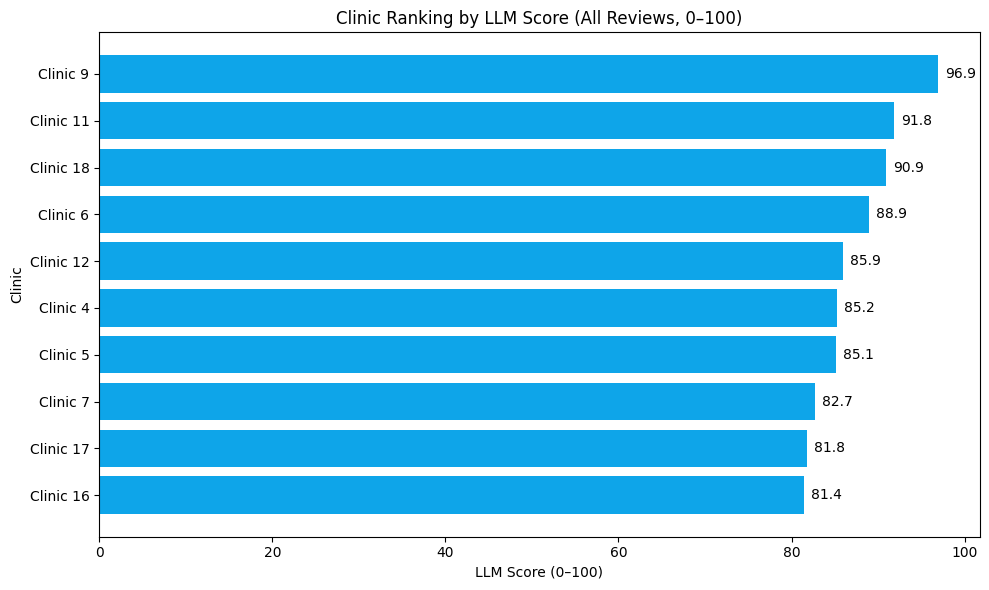

In [ ]:
# ================================================
# All-Reviews LLM-Based Clinic Ranking (Chunked) with Fallback
# ================================================
import os, json, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------- Configuration ---------
TEXT_COL = "text_clean" if "text_clean" in df.columns else ("review_text" if "review_text" in df.columns else None)
if TEXT_COL is None:
    raise ValueError("No text column found. Expected 'text_clean' or 'review_text'.")

CLINIC_COL_EN   = "_clinic_en" if "_clinic_en" in df.columns else "clinic_name"
CLINIC_COL_ORIG = "clinic_name" if "clinic_name" in df.columns else CLINIC_COL_EN

USE_LLM = True                # set False to force fallback
OPENAI_API_KEY = ""           # put your key here or leave empty to read from env
LLM_MODEL = "gpt-4o-mini"     # adjust as needed

# Chunking: approximate char-based limit per chunk (safe for chat input)
MAX_CHARS_PER_CHUNK = 6000    # tweak if needed
MAX_CHUNKS_PER_CLINIC = 20    # safeguard against extreme clinics

TOP_N_PLOT = 10

# --------- Setup ---------
os.makedirs("images", exist_ok=True)
os.makedirs("data", exist_ok=True)

if not OPENAI_API_KEY:
    import os as _os
    OPENAI_API_KEY = _os.getenv("OPENAI_API_KEY", "")

# --------- Helpers ---------
def chunk_reviews(texts, max_chars=6000, max_chunks=20):
    """Greedy pack reviews into <= max_chunks chunks, each <= max_chars."""
    chunks, cur = [], ""
    for t in texts:
        t = str(t).strip()
        if not t:
            continue
        candidate = (cur + "\n- " + t) if cur else ("- " + t)
        if len(candidate) <= max_chars:
            cur = candidate
        else:
            if cur:
                chunks.append(cur)
            cur = "- " + t
            if len(chunks) >= max_chunks:
                break
    if cur and len(chunks) < max_chunks:
        chunks.append(cur)
    return chunks

def llm_summarize_clinic(clinic_en, clinic_orig, chunks):
    """Summarize all chunks with LLM: chunk summaries -> final decision JSON."""
    if not USE_LLM or not OPENAI_API_KEY or not chunks:
        return None
    try:
        from openai import OpenAI
        client = OpenAI(api_key=OPENAI_API_KEY)
    except Exception:
        return None

    # 1) Summarize each chunk briefly
    chunk_summaries = []
    sys_chunk = (
        "Summarize these dental clinic review snippets in 3–5 bullet points. "
        "Be precise and avoid pros/cons lists unless obvious."
    )
    for ch in chunks:
        try:
            resp = client.chat.completions.create(
                model=LLM_MODEL,
                messages=[{"role":"system","content":sys_chunk},
                          {"role":"user","content":ch[:12000]}],
                temperature=0.2,
                max_tokens=300,
            )
            chunk_summaries.append(resp.choices[0].message.content.strip())
        except Exception:
            # If any chunk fails, continue with what we have
            continue

    if not chunk_summaries:
        return None

    # 2) Final decision using all chunk summaries
    sys_final = (
        "You are an impartial analyst. Given multiple summaries of a clinic's reviews, "
        "produce a rigorous overall assessment.\n"
        "Return STRICT JSON with keys:\n"
        "  clinic_en: string\n"
        "  clinic_original: string\n"
        "  score_0_100: number (0-100, higher is better overall experience)\n"
        "  strengths: array of short strings\n"
        "  weaknesses: array of short strings\n"
        "  summary: one concise paragraph\n"
        "No extra text besides JSON."
    )
    user_final = f"Clinic (EN): {clinic_en}\nClinic (Original): {clinic_orig}\nChunk Summaries:\n" + \
                 "\n\n---\n\n".join(chunk_summaries[:50])

    try:
        resp = client.chat.completions.create(
            model=LLM_MODEL,
            messages=[{"role":"system","content":sys_final},
                      {"role":"user","content":user_final}],
            temperature=0.2,
            max_tokens=500,
        )
        content = resp.choices[0].message.content.strip()
        if content.startswith("```"):
            content = content.strip("`")
            content = content.split("\n", 1)[-1]
        data = json.loads(content)
        if "score_0_100" not in data:
            return None
        return data
    except Exception:
        return None

def fallback_from_sentiment(group: pd.DataFrame):
    """Deterministic score based on free model sentiment; includes simple strengths/weaknesses from aspects if available."""
    m = group["sentiment_model"].astype(str).str.lower().value_counts()
    pos = int(m.get("positive", 0)); neg = int(m.get("negative", 0)); neu = int(m.get("neutral", 0))
    total = max(1, pos + neg + neu)
    z = (pos - neg) / total
    score = round((z + 1) * 50, 1)  # [-1,1] -> [0,100]

    strengths, weaknesses = [], []
    if "aspects" in group.columns:
        exploded = group.explode("aspects").dropna(subset=["aspects"])
        if not exploded.empty:
            cnt = exploded.groupby(["aspects","sentiment_model"]).size().unstack(fill_value=0)
            if "positive" in cnt.columns and "negative" in cnt.columns:
                good = (cnt["positive"] - cnt["negative"]).sort_values(ascending=False)
                strengths = [f"{a} (Δ={int(delta)})" for a, delta in good.head(3).items() if delta > 0]
                bad = (cnt["negative"] - cnt["positive"]).sort_values(ascending=False)
                weaknesses = [f"{a} (Δ={int(delta)})" for a, delta in bad.head(3).items() if delta > 0]
    summary = f"Fallback based on {total} reviews: positive={pos}, neutral={neu}, negative={neg}."
    return float(score), strengths, weaknesses, summary

# --------- Build ranking using ALL reviews per clinic ---------
records = []
for clinic_en, g in df.groupby(CLINIC_COL_EN, dropna=False):
    clinic_orig = str(g[CLINIC_COL_ORIG].iloc[0]) if CLINIC_COL_ORIG in g.columns else clinic_en
    texts = g[TEXT_COL].dropna().astype(str).tolist()
    chunks = chunk_reviews(texts, max_chars=MAX_CHARS_PER_CHUNK, max_chunks=MAX_CHUNKS_PER_CLINIC)

    data = llm_summarize_clinic(clinic_en, clinic_orig, chunks)

    if data is None:
        score, strengths, weaknesses, summary = fallback_from_sentiment(g)
        data = {
            "clinic_en": clinic_en,
            "clinic_original": clinic_orig,
            "score_0_100": score,
            "strengths": strengths,
            "weaknesses": weaknesses,
            "summary": summary,
            "source": "fallback"
        }
    else:
        data["source"] = "llm"

    # Attach base metrics
    total_reviews = int(g.shape[0])
    pos_pct = float((g["sentiment_model"].astype(str).str.lower() == "positive").mean() * 100.0)
    neg_pct = float((g["sentiment_model"].astype(str).str.lower() == "negative").mean() * 100.0)
    data["total_reviews"] = total_reviews
    data["positive_pct"] = round(pos_pct, 2)
    data["negative_pct"] = round(neg_pct, 2)

    records.append(data)

rank_df = pd.DataFrame(records)
rank_df = rank_df.sort_values(["score_0_100","positive_pct","total_reviews"], ascending=[False, False, False])

# --------- Save and plot ---------
out_csv = "data/clinic_llm_ranking_all_reviews.csv"
rank_df.to_csv(out_csv, index=False, encoding="utf-8-sig")
print("Saved:", out_csv)
display(rank_df.head(10))

# Plot (English)
TOP_N = min(TOP_N_PLOT, rank_df.shape[0])
top_plot = rank_df.head(TOP_N)

plt.figure(figsize=(10,6))
bars = plt.barh(top_plot["clinic_en"], top_plot["score_0_100"], color="#0ea5e9")
plt.title("Clinic Ranking by LLM Score (All Reviews, 0–100)")
plt.xlabel("LLM Score (0–100)")
plt.ylabel("Clinic")
plt.gca().invert_yaxis()
for b in bars:
    w = b.get_width()
    plt.text(w + 0.8, b.get_y() + b.get_height()/2, f"{w:.1f}", va="center")
plt.tight_layout()
plt.savefig("images/clinic_llm_ranking_all_reviews.png", dpi=150)
plt.show()


# Review Authenticity & Trust-Adjusted Ranking

/tmp/ipython-input-3713319650.py:110: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df["_near_dup"] = df.groupby(CLINIC_COL_EN, group_keys=False).apply(mark_near_dups)


Saved: data/clinic_final_ranking_llm_blended.csv


,clinic_en,clinic_original,llm_score_0_100,clinic_trust_0_1,final_score_0_100,source,strengths,weaknesses,summary
17,Clinic 9,عيادات درة العالمي لطب الاسنان,96.9,0.998031,97.77,fallback,[],[],Fallback scoring.
2,Clinic 11,مجمع علم الرازي الطبي العام,91.8,0.982237,93.73,fallback,[],[],Fallback scoring.
9,Clinic 18,Alghassab Dental Clinics,90.9,0.978205,92.98,fallback,[],[],Fallback scoring.
14,Clinic 6,المهيدب لطب الاسنان,88.9,0.961111,91.06,fallback,[],[],Fallback scoring.
3,Clinic 12,المهيدب لطب الاسنان حائل,85.9,0.972549,89.31,fallback,[],[],Fallback scoring.
12,Clinic 4,عيادة د.توث DR.TOOTH CLINIC,85.2,0.972368,88.81,fallback,[],[],Fallback scoring.
15,Clinic 7,صفوة المهيدب لطب الأسنان حائل,82.7,0.976979,87.20,fallback,[],[],Fallback scoring.
7,Clinic 16,عيادات عاجي لطب وتقويم وزراعة الأسنان - فرع حائل,81.4,0.995736,86.85,fallback,[],[],Fallback scoring.
13,Clinic 5,مجمع عيادات طابة دنت لطب الأسنان - حائل,85.1,0.904762,86.71,fallback,[],[],Fallback scoring.
6,Clinic 15,مجمع المهيدب لطب الأسنان,81.0,0.983893,86.22,fallback,[],[],Fallback scoring.


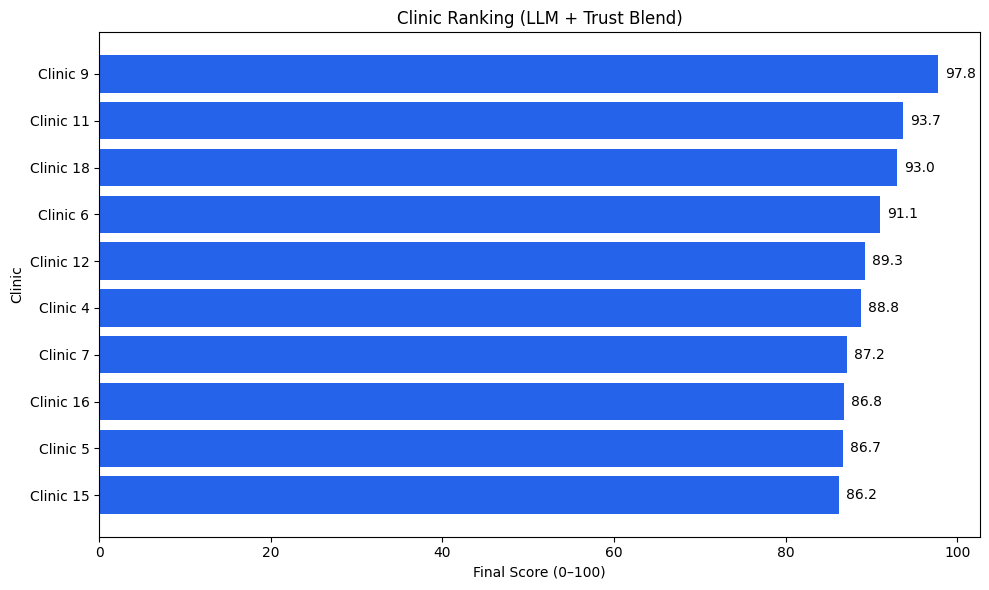

In [ ]:
# ============================================================
# Full pipeline: fake/dup/spam checks + LLM clinic ranking + blend
# ============================================================
import os, re, math, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# ---------------- Configuration ----------------
TEXT_COL = "text_clean" if "text_clean" in df.columns else ("review_text" if "review_text" in df.columns else None)
if TEXT_COL is None:
    raise ValueError("No text column found. Expected 'text_clean' or 'review_text'.")

CLINIC_COL_EN   = "_clinic_en" if "_clinic_en" in df.columns else "clinic_name"
CLINIC_COL_ORIG = "clinic_name" if "clinic_name" in df.columns else CLINIC_COL_EN

DATE_COL     = "review_datetime" if "review_datetime" in df.columns else None
RATING_COL   = "rating" if "rating" in df.columns else None
REVIEWER_COL = "reviewer_id" if "reviewer_id" in df.columns else None
SENT_COL     = "sentiment_model" if "sentiment_model" in df.columns else None

# LLM settings
USE_LLM = True                                # set False to force fallback
OPENAI_API_KEY = ""                           # put your key here or set env OPENAI_API_KEY
LLM_MODEL = "gpt-4o-mini"
MAX_CHARS_PER_CHUNK = 6000
MAX_CHUNKS_PER_CLINIC = 20

# Blending weights (final score in [0,100])
W_LLM   = 0.7
W_TRUST = 0.3

TOP_N_PLOT = 10

# ---------------- Setup ----------------
os.makedirs("images", exist_ok=True)
os.makedirs("data", exist_ok=True)

if not OPENAI_API_KEY:
    import os as _os
    OPENAI_API_KEY = _os.getenv("OPENAI_API_KEY", "")

df = df.copy()
df["_text"] = df[TEXT_COL].fillna("").astype(str)

# ---------------- Normalization & text stats ----------------
AR_PUNCT = r"[^ء-يA-Za-z0-9\s]+"

def normalize_text(s: str) -> str:
    s = s.lower().strip()
    s = re.sub(r"http\S+|www\.\S+", " ", s)
    s = re.sub(AR_PUNCT, " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

def char_entropy(s: str) -> float:
    if not s:
        return 0.0
    counts = Counter(s)
    total = len(s)
    probs = [c/total for c in counts.values()]
    return -sum(p * math.log(p + 1e-12, 2) for p in probs)

def unique_token_ratio(s: str) -> float:
    toks = s.split()
    return 0.0 if not toks else len(set(toks)) / len(toks)

def max_repeated_bigram_share(s: str) -> float:
    toks = s.split()
    if len(toks) < 2:
        return 0.0
    bigrams = list(zip(toks, toks[1:]))
    counts = Counter(bigrams)
    most = counts.most_common(1)[0][1]
    return most / max(1, len(bigrams))

def has_promo_patterns(s: str) -> bool:
    return bool(re.search(r"(05\d{7,}|966\d{8,}|\+?\d{8,})", s)) or \
           bool(re.search(r"(whatsapp|snap|instagram|promo|offer|خصم|تخفيض)", s, re.I)) or \
           ("google maps" in s or "location" in s)

def has_many_emojis_or_symbols(raw: str) -> bool:
    return sum(ch in "★☆❤✨🎉😍😊👍🤩❤️" for ch in raw) >= 3

df["_norm"] = df["_text"].apply(normalize_text)

# ---------------- Signal 1: exact duplicates ----------------
df["_norm_hash"] = df["_norm"].apply(lambda s: hash(s))
df["_exact_dup"] = df.duplicated(subset=["_norm_hash"], keep=False)

# ---------------- Signal 2: near-duplicates (per clinic) ----------------
def mark_near_dups(group: pd.DataFrame, thr_sim=0.95, n_neighbors=5):
    if group.shape[0] < 2:
        return pd.Series([False]*group.shape[0], index=group.index)
    vect = TfidfVectorizer(analyzer="char", ngram_range=(3,5), min_df=2)
    X = vect.fit_transform(group["_norm"])
    nn = NearestNeighbors(metric="cosine", n_neighbors=min(n_neighbors, group.shape[0]))
    nn.fit(X)
    dist, idxs = nn.kneighbors(X, return_distance=True)
    is_dup = []
    for i in range(group.shape[0]):
        sims = 1 - dist[i]  # cosine similarity
        dup_flag = any((j != i) and (sims[k] >= thr_sim) for k, j in enumerate(idxs[i]))
        is_dup.append(dup_flag)
    return pd.Series(is_dup, index=group.index)

df["_near_dup"] = df.groupby(CLINIC_COL_EN, group_keys=False).apply(mark_near_dups)

# ---------------- Signal 3: spammy patterns ----------------
df["_len"]          = df["_norm"].str.len()
df["_entropy"]      = df["_norm"].apply(char_entropy)
df["_uniq_ratio"]   = df["_norm"].apply(unique_token_ratio)
df["_bigram_repeat"]= df["_norm"].apply(max_repeated_bigram_share)
df["_promo"]        = df["_norm"].apply(has_promo_patterns)
df["_emojis"]       = df[TEXT_COL].apply(has_many_emojis_or_symbols)

SHORT_LEN = 20
LOW_ENTROPY = 2.6
LOW_UNIQ = 0.35
HIGH_BIGRAM_REPEAT = 0.25

df["_spammy_short"]   = df["_len"] < SHORT_LEN
df["_spammy_entropy"] = df["_entropy"] < LOW_ENTROPY
df["_spammy_uniq"]    = df["_uniq_ratio"] < LOW_UNIQ
df["_spammy_repeat"]  = df["_bigram_repeat"] >= HIGH_BIGRAM_REPEAT

# ---------------- Signal 4: bursts (if dates exist) ----------------
df["_burst"] = False
if DATE_COL is not None and DATE_COL in df.columns:
    _dt = pd.to_datetime(df[DATE_COL], errors="coerce")
    if _dt.notna().any():
        d = df.copy()
        d["_dt"] = _dt
        daily = (d.dropna(subset=["_dt"])
                   .groupby([CLINIC_COL_EN, d["_dt"].dt.date])
                   .size().rename("n").reset_index())
        daily["z"] = daily.groupby(CLINIC_COL_EN)["n"].transform(lambda x: (x - x.mean())/(x.std(ddof=0)+1e-9))
        spike_days = daily[daily["z"] >= 2.0][[CLINIC_COL_EN, "_dt"]]
        spike_days["_date_only"] = spike_days["_dt"].dt.date
        df["_date_only"] = _dt.dt.date
        df = df.merge(spike_days[[CLINIC_COL_EN, "_date_only"]].assign(_burst=True),
                      how="left",
                      left_on=[CLINIC_COL_EN, "_date_only"],
                      right_on=[CLINIC_COL_EN, "_date_only"])
        df["_burst"] = df["_burst"].fillna(False).astype(bool)

# ---------------- Signal 5: reviewer anomalies ----------------
df["_reviewer_anom"] = False
if REVIEWER_COL is not None and REVIEWER_COL in df.columns:
    mc = df.groupby(REVIEWER_COL)[CLINIC_COL_EN].nunique().rename("clinics_count")
    multi = set(mc[mc >= 3].index.tolist())
    df["_reviewer_anom"] = df[REVIEWER_COL].isin(multi)

# ---------------- Signal 6: rating–sentiment mismatch ----------------
df["_rating_mismatch"] = False
if RATING_COL is not None and SENT_COL is not None and RATING_COL in df.columns and SENT_COL in df.columns:
    sent = df[SENT_COL].astype(str).str.lower()
    rating = pd.to_numeric(df[RATING_COL], errors="coerce")
    mismatch = ((rating >= 4) & (sent == "negative")) | ((rating <= 2) & (sent == "positive"))
    df["_rating_mismatch"] = mismatch.fillna(False)

# ---------------- Authenticity score per review ----------------
def clip01(x):
    return max(0.0, min(1.0, x))

W = {
    "exact_dup":       0.50,
    "near_dup":        0.35,
    "spammy_short":    0.15,
    "spammy_entropy":  0.10,
    "spammy_uniq":     0.10,
    "spammy_repeat":   0.10,
    "promo":           0.20,
    "emojis":          0.05,
    "burst":           0.15,
    "reviewer_anom":   0.15,
    "rating_mismatch": 0.10,
}

def authenticity_score(row) -> float:
    s = 1.0
    s -= W["exact_dup"]       if row.get("_exact_dup", False)      else 0.0
    s -= W["near_dup"]        if row.get("_near_dup", False)       else 0.0
    s -= W["spammy_short"]    if row.get("_spammy_short", False)   else 0.0
    s -= W["spammy_entropy"]  if row.get("_spammy_entropy", False) else 0.0
    s -= W["spammy_uniq"]     if row.get("_spammy_uniq", False)    else 0.0
    s -= W["spammy_repeat"]   if row.get("_spammy_repeat", False)  else 0.0
    s -= W["promo"]           if row.get("_promo", False)          else 0.0
    s -= W["emojis"]          if row.get("_emojis", False)         else 0.0
    s -= W["burst"]           if row.get("_burst", False)          else 0.0
    s -= W["reviewer_anom"]   if row.get("_reviewer_anom", False)  else 0.0
    s -= W["rating_mismatch"] if row.get("_rating_mismatch", False)else 0.0
    return clip01(s)

df["authenticity_score"] = df.apply(authenticity_score, axis=1)

# ---------------- Aggregate per clinic (trust) ----------------
trust = df.groupby(CLINIC_COL_EN)["authenticity_score"].mean().rename("clinic_trust").to_frame()

# ---------------- LLM scoring per clinic (all reviews, chunked) ----------------
def chunk_reviews(texts, max_chars=6000, max_chunks=20):
    chunks, cur = [], ""
    for t in texts:
        t = str(t).strip()
        if not t:
            continue
        candidate = (cur + "\n- " + t) if cur else ("- " + t)
        if len(candidate) <= max_chars:
            cur = candidate
        else:
            if cur:
                chunks.append(cur)
            cur = "- " + t
            if len(chunks) >= max_chunks:
                break
    if cur and len(chunks) < max_chunks:
        chunks.append(cur)
    return chunks

def llm_score_clinic(clinic_en, clinic_orig, texts):
    if not USE_LLM or not OPENAI_API_KEY:
        return None
    try:
        from openai import OpenAI
        client = OpenAI(api_key=OPENAI_API_KEY)
    except Exception:
        return None

    chunks = chunk_reviews(texts, MAX_CHARS_PER_CHUNK, MAX_CHUNKS_PER_CLINIC)
    if not chunks:
        return None

    # Summarize chunks
    chunk_summaries = []
    sys_chunk = "Summarize these dental clinic review snippets in 3–5 bullet points. Be precise."
    for ch in chunks:
        try:
            r = client.chat.completions.create(
                model=LLM_MODEL,
                messages=[{"role":"system","content":sys_chunk},
                          {"role":"user","content":ch[:12000]}],
                temperature=0.2, max_tokens=300
            )
            chunk_summaries.append(r.choices[0].message.content.strip())
        except Exception:
            continue
    if not chunk_summaries:
        return None

    # Final scoring
    sys_final = (
        "You are an impartial analyst. Given multiple summaries of a clinic's reviews, "
        "produce an overall assessment. Return STRICT JSON only:\n"
        "{\n"
        '  "clinic_en": string,\n'
        '  "clinic_original": string,\n'
        '  "score_0_100": number,\n'
        '  "strengths": [string],\n'
        '  "weaknesses": [string],\n'
        '  "summary": string\n'
        "}"
    )
    user_final = f"Clinic (EN): {clinic_en}\nClinic (Original): {clinic_orig}\nChunk Summaries:\n" + \
                 "\n\n---\n\n".join(chunk_summaries[:50])
    try:
        r = client.chat.completions.create(
            model=LLM_MODEL,
            messages=[{"role":"system","content":sys_final},
                      {"role":"user","content":user_final}],
            temperature=0.2, max_tokens=500
        )
        content = r.choices[0].message.content.strip()
        if content.startswith("```"):
            content = content.strip("`")
            content = content.split("\n", 1)[-1]
        data = json.loads(content)
        if "score_0_100" not in data:
            return None
        return data
    except Exception:
        return None

def fallback_llm_score(group: pd.DataFrame) -> dict:
    # sentiment-based fallback scaled to [0,100]
    if SENT_COL and SENT_COL in group.columns:
        s = group[SENT_COL].astype(str).str.lower().value_counts()
        pos, neg, neu = int(s.get("positive",0)), int(s.get("negative",0)), int(s.get("neutral",0))
        total = max(1, pos+neg+neu)
        z = (pos - neg) / total
        score = round((z + 1) * 50, 1)
    else:
        score = 50.0
    return {"score_0_100": float(score), "strengths": [], "weaknesses": [], "summary": "Fallback scoring."}

records = []
for clinic_en, g in df.groupby(CLINIC_COL_EN, dropna=False):
    clinic_orig = str(g[CLINIC_COL_ORIG].iloc[0]) if CLINIC_COL_ORIG in g.columns else clinic_en
    texts = g[TEXT_COL].dropna().astype(str).tolist()

    llm_data = llm_score_clinic(clinic_en, clinic_orig, texts)
    src = "llm" if llm_data is not None else "fallback"
    if llm_data is None:
        llm_data = fallback_llm_score(g)

    # Combine with trust
    clinic_trust = float(trust.loc[clinic_en, "clinic_trust"]) if clinic_en in trust.index else 0.0
    final_score = W_LLM * (llm_data["score_0_100"]/100.0) + W_TRUST * clinic_trust
    final_score = round(final_score * 100.0, 2)

    # collect
    out = {
        "clinic_en": clinic_en,
        "clinic_original": clinic_orig,
        "llm_score_0_100": float(llm_data["score_0_100"]),
        "clinic_trust_0_1": clinic_trust,
        "final_score_0_100": final_score,
        "source": src,
        "strengths": llm_data.get("strengths", []),
        "weaknesses": llm_data.get("weaknesses", []),
        "summary": llm_data.get("summary", "")
    }
    records.append(out)

rank_df = pd.DataFrame(records).sort_values(
    ["final_score_0_100","llm_score_0_100","clinic_trust_0_1"], ascending=[False, False, False]
)

# ---------------- Save + Plot ----------------
rank_csv = "data/clinic_final_ranking_llm_blended.csv"
rank_df.to_csv(rank_csv, index=False, encoding="utf-8-sig")
print("Saved:", rank_csv)
display(rank_df.head(10))

plt.figure(figsize=(10,6))
top = rank_df.head(min(TOP_N_PLOT, rank_df.shape[0]))
bars = plt.barh(top["clinic_en"], top["final_score_0_100"], color="#2563eb")
plt.title("Clinic Ranking (LLM + Trust Blend)")
plt.xlabel("Final Score (0–100)")
plt.ylabel("Clinic")
plt.gca().invert_yaxis()
for b in bars:
    w = b.get_width()
    plt.text(w + 0.8, b.get_y() + b.get_height()/2, f"{w:.1f}", va="center")
plt.tight_layout()
plt.savefig("images/clinic_final_ranking_llm_blended.png", dpi=150)
plt.show()
